In [240]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from helpers import *

# from test_utils import test

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Loading

In [23]:

x ,y ,ids = load_csv("dataset/x_test.csv", "dataset/y_train.csv")

# Valeurs
# print(x)


FileNotFoundError:  not found.

In [68]:
y, ids, labels = load_csv_1("dataset/x_test.csv")

In [75]:
id1 = np.where(labels == '_RFCHOL')
id2 = np.where(labels == 'BPHIGH4')
print(id1[0])
print(id2[0])

[234]
[34]


## Just for vizualisation 

In [3]:
import pandas as pd 

data = pd.read_csv('dataset/x_test.csv')

In [4]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
#pd.set_option('display.expand_frame_repr', False)

In [5]:
data.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENUM,PVTRESD1,COLGHOUS,STATERES,CELLFON3,LADULT,NUMADULT,NUMMEN,NUMWOMEN,CTELNUM1,CELLFON2,CADULT,PVTRESD2,CCLGHOUS,CSTATE,LANDLINE,HHADULT,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,PERSDOC2,MEDCOST,CHECKUP1,BPHIGH4,BPMEDS,BLOODCHO,CHOLCHK,TOLDHI2,CVDSTRK3,ASTHMA3,ASTHNOW,CHCSCNCR,CHCOCNCR,CHCCOPD1,HAVARTH3,ADDEPEV2,CHCKIDNY,DIABETE3,DIABAGE2,SEX,MARITAL,EDUCA,RENTHOM1,NUMHHOL2,NUMPHON2,CPDEMO1,VETERAN3,EMPLOY1,CHILDREN,INCOME2,INTERNET,WEIGHT2,HEIGHT3,PREGNANT,QLACTLM2,USEEQUIP,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,SMOKE100,SMOKDAY2,STOPSMK2,LASTSMK2,USENOW3,ALCDAY5,AVEDRNK2,DRNK3GE5,MAXDRNKS,FRUITJU1,FRUIT1,FVBEANS,FVGREEN,FVORANG,VEGETAB1,EXERANY2,EXRACT11,EXEROFT1,EXERHMM1,EXRACT21,EXEROFT2,EXERHMM2,STRENGTH,LMTJOIN3,ARTHDIS2,ARTHSOCL,JOINPAIN,SEATBELT,FLUSHOT6,FLSHTMY2,IMFVPLAC,PNEUVAC3,HIVTST6,HIVTSTD3,WHRTST10,PDIABTST,PREDIAB1,INSULIN,BLDSUGAR,FEETCHK2,DOCTDIAB,CHKHEMO3,FEETCHK,EYEEXAM,DIABEYE,DIABEDU,CAREGIV1,CRGVREL1,CRGVLNG1,CRGVHRS1,CRGVPRB1,CRGVPERS,CRGVHOUS,CRGVMST2,CRGVEXPT,VIDFCLT2,VIREDIF3,VIPRFVS2,VINOCRE2,VIEYEXM2,VIINSUR2,VICTRCT4,VIGLUMA2,VIMACDG2,CIMEMLOS,CDHOUSE,CDASSIST,CDHELP,CDSOCIAL,CDDISCUS,WTCHSALT,LONGWTCH,DRADVISE,ASTHMAGE,ASATTACK,ASERVIST,ASDRVIST,ASRCHKUP,ASACTLIM,ASYMPTOM,ASNOSLEP,ASTHMED3,ASINHALR,HAREHAB1,STREHAB1,CVDASPRN,ASPUNSAF,RLIVPAIN,RDUCHART,RDUCSTRK,ARTTODAY,ARTHWGT,ARTHEXER,ARTHEDU,TETANUS,HPVADVC2,HPVADSHT,SHINGLE2,HADMAM,HOWLONG,HADPAP2,LASTPAP2,HPVTEST,HPLSTTST,HADHYST2,PROFEXAM,LENGEXAM,BLDSTOOL,LSTBLDS3,HADSIGM3,HADSGCO1,LASTSIG3,PCPSAAD2,PCPSADI1,PCPSARE1,PSATEST1,PSATIME,PCPSARS1,PCPSADE1,PCDMDECN,SCNTMNY1,SCNTMEL1,SCNTPAID,SCNTWRK1,SCNTLPAD,SCNTLWK1,SXORIENT,TRNSGNDR,RCSGENDR,RCSRLTN2,CASTHDX2,CASTHNO2,EMTSUPRT,LSATISFY,ADPLEASR,ADDOWN,ADSLEEP,ADENERGY,ADEAT1,ADFAIL,ADTHINK,ADMOVE,MISTMNT,ADANXEV,QSTVER,QSTLANG,MSCODE,_STSTR,_STRWT,_RAWRAKE,_WT2RAKE,_CHISPNC,_CRACE1,_CPRACE,_CLLCPWT,_DUALUSE,_DUALCOR,_LLCPWT,_RFHLTH,_HCVU651,_RFHYPE5,_CHOLCHK,_RFCHOL,_LTASTH1,_CASTHM1,_ASTHMS1,_DRDXAR1,_PRACE1,_MRACE1,_HISPANC,_RACE,_RACEG21,_RACEGR3,_RACE_G1,_AGEG5YR,_AGE65YR,_AGE80,_AGE_G,HTIN4,HTM4,WTKG3,_BMI5,_BMI5CAT,_RFBMI5,_CHLDCNT,_EDUCAG,_INCOMG,_SMOKER3,_RFSMOK3,DRNKANY5,DROCDY3_,_RFBING5,_DRNKWEK,_RFDRHV5,FTJUDA1_,FRUTDA1_,BEANDAY_,GRENDAY_,ORNGDAY_,VEGEDA1_,_MISFRTN,_MISVEGN,_FRTRESP,_VEGRESP,_FRUTSUM,_VEGESUM,_FRTLT1,_VEGLT1,_FRT16,_VEG23,_FRUITEX,_VEGETEX,_TOTINDA,METVL11_,METVL21_,MAXVO2_,FC60_,ACTIN11_,ACTIN21_,PADUR1_,PADUR2_,PAFREQ1_,PAFREQ2_,_MINAC11,_MINAC21,STRFREQ_,PAMISS1_,PAMIN11_,PAMIN21_,PA1MIN_,PAVIG11_,PAVIG21_,PA1VIGM_,_PACAT1,_PAINDX1,_PA150R2,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_LMTACT1,_LMTWRK1,_LMTSCL1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
0,44,2,2082015,2,8,2015,1100,2015000284,2015000284,1.0,1.0,NaN,1.0,1.0,NaN,1.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,88,88,NaN,1,1,2,1,1,1.0,1,1.0,1.0,2,2,NaN,2,2,2,2,2,2,3.0,NaN,2,3,6,1,2.0,NaN,2.0,2.0,7,88.0,99.0,2.0,118.0,501.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,3.0,888.0,NaN,NaN,NaN,555.0,102.0,555.0,101.0,204.0,101.0,1.0,64.0,101.0,30.0,73.0,106.0,200.0,888.0,NaN,NaN,NaN,NaN,1.0,1.0,112014.0,5.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,5.0,NaN,NaN,1.0,35.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,1.0,2.0,441011,8.278775,1.0,8.278775,9.0,NaN,NaN,NaN,9,NaN,22.601497,1,9,2,1,2.0,1,1,3,2.0,1,1,2,1,1,1,1.0,13,2,80,6,61.0,1.55,53.52,22.30,2.0,1,1,4,9,4,1,2,0,1,0,1,0.0,2.00,0.00,1.00,0.57,1.00,0,0,1,1,2.00,2.57,1,1,1,1,0,0,1,3.5,3.3,14.70,2.52,2.0,2.0,30.0,120.0,1.000,6.0,30.0,720.0,0.0,0,60.0,1440.0,1500.0,30.0,720.0,750.0,1,1,1,1,1,2,2,2,3.0,3.0,4.0,1,1,1.0,1.0,2.0
1,27,1,119201

In [6]:
data.head(50)

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENUM,PVTRESD1,COLGHOUS,STATERES,CELLFON3,LADULT,NUMADULT,NUMMEN,NUMWOMEN,CTELNUM1,CELLFON2,CADULT,PVTRESD2,CCLGHOUS,CSTATE,LANDLINE,HHADULT,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,PERSDOC2,MEDCOST,CHECKUP1,BPHIGH4,BPMEDS,BLOODCHO,CHOLCHK,TOLDHI2,CVDSTRK3,ASTHMA3,ASTHNOW,CHCSCNCR,CHCOCNCR,CHCCOPD1,HAVARTH3,ADDEPEV2,CHCKIDNY,DIABETE3,DIABAGE2,SEX,MARITAL,EDUCA,RENTHOM1,NUMHHOL2,NUMPHON2,CPDEMO1,VETERAN3,EMPLOY1,CHILDREN,INCOME2,INTERNET,WEIGHT2,HEIGHT3,PREGNANT,QLACTLM2,USEEQUIP,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,SMOKE100,SMOKDAY2,STOPSMK2,LASTSMK2,USENOW3,ALCDAY5,AVEDRNK2,DRNK3GE5,MAXDRNKS,FRUITJU1,FRUIT1,FVBEANS,FVGREEN,FVORANG,VEGETAB1,EXERANY2,EXRACT11,EXEROFT1,EXERHMM1,EXRACT21,EXEROFT2,EXERHMM2,STRENGTH,LMTJOIN3,ARTHDIS2,ARTHSOCL,JOINPAIN,SEATBELT,FLUSHOT6,FLSHTMY2,IMFVPLAC,PNEUVAC3,HIVTST6,HIVTSTD3,WHRTST10,PDIABTST,PREDIAB1,INSULIN,BLDSUGAR,FEETCHK2,DOCTDIAB,CHKHEMO3,FEETCHK,EYEEXAM,DIABEYE,DIABEDU,CAREGIV1,CRGVREL1,CRGVLNG1,CRGVHRS1,CRGVPRB1,CRGVPERS,CRGVHOUS,CRGVMST2,CRGVEXPT,VIDFCLT2,VIREDIF3,VIPRFVS2,VINOCRE2,VIEYEXM2,VIINSUR2,VICTRCT4,VIGLUMA2,VIMACDG2,CIMEMLOS,CDHOUSE,CDASSIST,CDHELP,CDSOCIAL,CDDISCUS,WTCHSALT,LONGWTCH,DRADVISE,ASTHMAGE,ASATTACK,ASERVIST,ASDRVIST,ASRCHKUP,ASACTLIM,ASYMPTOM,ASNOSLEP,ASTHMED3,ASINHALR,HAREHAB1,STREHAB1,CVDASPRN,ASPUNSAF,RLIVPAIN,RDUCHART,RDUCSTRK,ARTTODAY,ARTHWGT,ARTHEXER,ARTHEDU,TETANUS,HPVADVC2,HPVADSHT,SHINGLE2,HADMAM,HOWLONG,HADPAP2,LASTPAP2,HPVTEST,HPLSTTST,HADHYST2,PROFEXAM,LENGEXAM,BLDSTOOL,LSTBLDS3,HADSIGM3,HADSGCO1,LASTSIG3,PCPSAAD2,PCPSADI1,PCPSARE1,PSATEST1,PSATIME,PCPSARS1,PCPSADE1,PCDMDECN,SCNTMNY1,SCNTMEL1,SCNTPAID,SCNTWRK1,SCNTLPAD,SCNTLWK1,SXORIENT,TRNSGNDR,RCSGENDR,RCSRLTN2,CASTHDX2,CASTHNO2,EMTSUPRT,LSATISFY,ADPLEASR,ADDOWN,ADSLEEP,ADENERGY,ADEAT1,ADFAIL,ADTHINK,ADMOVE,MISTMNT,ADANXEV,QSTVER,QSTLANG,MSCODE,_STSTR,_STRWT,_RAWRAKE,_WT2RAKE,_CHISPNC,_CRACE1,_CPRACE,_CLLCPWT,_DUALUSE,_DUALCOR,_LLCPWT,_RFHLTH,_HCVU651,_RFHYPE5,_CHOLCHK,_RFCHOL,_LTASTH1,_CASTHM1,_ASTHMS1,_DRDXAR1,_PRACE1,_MRACE1,_HISPANC,_RACE,_RACEG21,_RACEGR3,_RACE_G1,_AGEG5YR,_AGE65YR,_AGE80,_AGE_G,HTIN4,HTM4,WTKG3,_BMI5,_BMI5CAT,_RFBMI5,_CHLDCNT,_EDUCAG,_INCOMG,_SMOKER3,_RFSMOK3,DRNKANY5,DROCDY3_,_RFBING5,_DRNKWEK,_RFDRHV5,FTJUDA1_,FRUTDA1_,BEANDAY_,GRENDAY_,ORNGDAY_,VEGEDA1_,_MISFRTN,_MISVEGN,_FRTRESP,_VEGRESP,_FRUTSUM,_VEGESUM,_FRTLT1,_VEGLT1,_FRT16,_VEG23,_FRUITEX,_VEGETEX,_TOTINDA,METVL11_,METVL21_,MAXVO2_,FC60_,ACTIN11_,ACTIN21_,PADUR1_,PADUR2_,PAFREQ1_,PAFREQ2_,_MINAC11,_MINAC21,STRFREQ_,PAMISS1_,PAMIN11_,PAMIN21_,PA1MIN_,PAVIG11_,PAVIG21_,PA1VIGM_,_PACAT1,_PAINDX1,_PA150R2,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_LMTACT1,_LMTWRK1,_LMTSCL1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
0,44,2,2082015,2,8,2015,1100,2015000284,2015000284,1.0,1.0,NaN,1.0,1.0,NaN,1.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,88,88,NaN,1,1,2,1,1,1.0,1,1.0,1.0,2,2,NaN,2,2,2,2,2,2,3.0,NaN,2,3,6,1,2.0,NaN,2.0,2.0,7,88.0,99.0,2.0,118.0,501.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,3.0,888.0,NaN,NaN,NaN,555.0,102.0,555.0,101.0,204.0,101.0,1.0,64.0,101.0,30.0,73.0,106.0,200.0,888.0,NaN,NaN,NaN,NaN,1.0,1.0,112014.0,5.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,5.0,NaN,NaN,1.0,35.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,1.0,2.0,441011,8.278775,1.0,8.278775,9.0,NaN,NaN,NaN,9,NaN,22.601497,1,9,2,1,2.0,1,1,3,2.0,1,1,2,1,1,1,1.0,13,2,80,6,61.0,1.55,53.52,22.30,2.0,1,1,4,9,4,1,2,0,1,0,1,0.00,2.00,0.00,1.00,0.57,1.00,0,0,1,1,2.00,2.57,1,1,1,1,0,0,1,3.5,3.3,14.70,2.52,2.0,2.0,30.0,120.0,1.000,6.000,30.0,720.0,0.000,0,60.0,1440.0,1500.0,30.0,720.0,750.0,1,1,1,1,1,2,2,2,3.0,3.0,4.0,1,1,1.0,1.0,2.0
1,27,1,1

In [8]:

data['_BMI5'].head(50)

0     22.30
1     21.93
2       NaN
3     23.89
4     29.29
5     26.63
6     26.61
7     24.80
8     25.79
9     25.97
10    21.95
11    25.29
12    25.06
13    25.09
14      NaN
15    22.24
16    21.63
17    40.89
18    29.76
19    34.01
20    43.76
21    21.95
22    43.85
23    30.67
24    31.89
25    50.13
26    30.54
27    27.12
28    19.89
29    22.96
30    26.31
31    24.80
32    29.99
33    26.00
34    25.77
35    19.97
36    34.58
37    19.77
38    22.31
39    25.84
40    26.58
41      NaN
42    29.13
43    33.28
44    27.46
45    20.54
46      NaN
47    31.38
48    32.69
49    31.75
Name: _BMI5, dtype: float64

## Clean Data (nan -> mean or nan -> Majority)

### All variables Cleanup

In [258]:
label_list = ["ID","MSCODE", "_HCVU651", "_RFHYPE5", "_RFCHOL", "_RACE", "_BMI5", "_EDUCAG", "_INCOMG", "_SMOKER3", "_DRNKWEK", "_FRUTSUM", "_VEGESUM", "PA1MIN_"]
label_ids = np.where(np.isin(labels, label_list))[0]
# list taken from website -1 is actually None 
exception_list = [-1,9,9,9,9,-1,9,9,9,99900,-1,-1,-1]

print(len(exception_list))

print(label_ids)
print(len(label_list))
print(len(label_ids))


13
[218 231 232 234 242 253 257 258 259 264 276 277 301]
14
13


In [200]:
label_list[0]

'MSCODE'

In [259]:
tab = [ids]

# Convert label_list to a NumPy array for efficient indexing
label_arr = np.array(label_list)

for i, j in zip(label_list, exception_list):
    id = np.where(label_arr == i)[0][0]  # Find the index using NumPy
    var = y[:, label_ids[id]]
    tab.append(data_clean(var, j))

# Convert tab into a 2D NumPy array
resulting_array = np.array(tab).T

# The shape of resulting_array will be (j, k), where j is the length of each array, and k is the number of arrays

print(resulting_array)
print(len(resulting_array))

[[     0      2      1 ...      2      2   1500]
 [     1      1      1 ...      2      1    180]
 [     2      1      1 ...      2      4    260]
 ...
 [109376      1      1 ...      1      1    486]
 [109377      1      1 ...      2      2    486]
 [109378      5      1 ...      1      1    232]]
109379


In [255]:
#tab = np.zeros((len(y[:,0]),len(label_list)))
tab = [ids,]


for i,j in zip(label_list,exception_list):
    id = label_list.index(i)
    var = y[:,label_ids[id]]
    print(i)
    print(var)
    print(len(var))
    tab.append(data_clean(var,j))


print(tab)
print(len(tab))   

MSCODE
[2 1 1 ... 1 1 5]
109379
_HCVU651
[1 1 1 ... 1 1 1]
109379
_RFHYPE5
[2 1 2 ... 1 1 2]
109379
_RFCHOL
[2 1 1 ... 1 1 2]
109379
_RACE
[1 1 1 ... 1 1 1]
109379
_BMI5
[22 21 27 ... 24 23 42]
109379
_EDUCAG
[4 4 4 ... 4 3 3]
109379
_INCOMG
[5 5 5 ... 3 5 5]
109379
_SMOKER3
[4 4 4 ... 3 3 4]
109379
_DRNKWEK
[   0 1200   93 ...    0   47    0]
109379
_FRUTSUM
[2 2 2 ... 1 2 1]
109379
_VEGESUM
[2 1 4 ... 1 2 1]
109379
PA1MIN_
[1500  180  260 ...  486  486  232]
109379
[range(0, 109379), array([2, 1, 1, ..., 1, 1, 5]), array([1, 1, 1, ..., 1, 1, 1]), array([2, 1, 2, ..., 1, 1, 2]), array([2, 1, 1, ..., 1, 1, 2]), array([1, 1, 1, ..., 1, 1, 1]), array([22, 21, 27, ..., 24, 23, 42]), array([4, 4, 4, ..., 4, 3, 3]), array([5, 5, 5, ..., 3, 5, 5]), array([4, 4, 4, ..., 3, 3, 4]), array([   0, 1200,   93, ...,    0,   47,    0]), array([2, 2, 2, ..., 1, 2, 1]), array([2, 1, 4, ..., 1, 2, 1]), array([1500,  180,  260, ...,  486,  486,  232])]
14


In [260]:
create_csv(ids, label_list, resulting_array, "test1.csv")

109379
109379
CSV file 'test1.csv' has been created successfully.


### Tests 

218


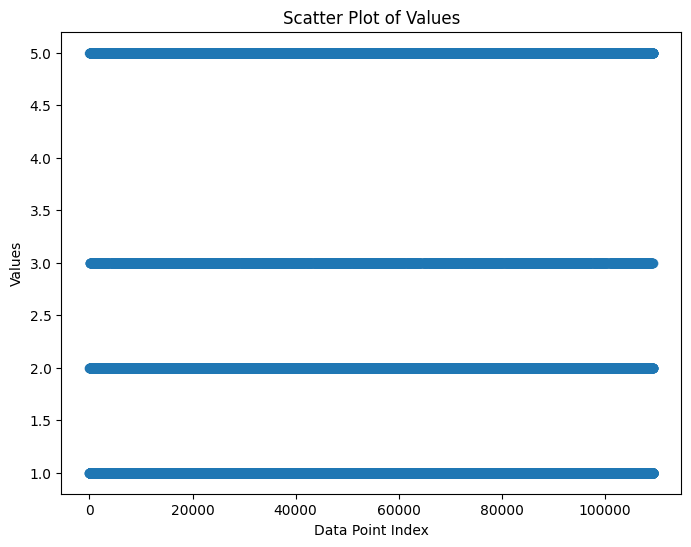

In [196]:
id = label_list.index("MSCODE")
print(label_ids[id])

cat = y[:,label_ids[id]]
plot_scatter(cat) 

In [197]:
if -1 in cat:
        print("There are values in the array.")
if np.isnan(cat).any:
        print("there is nan") 

there is nan


264


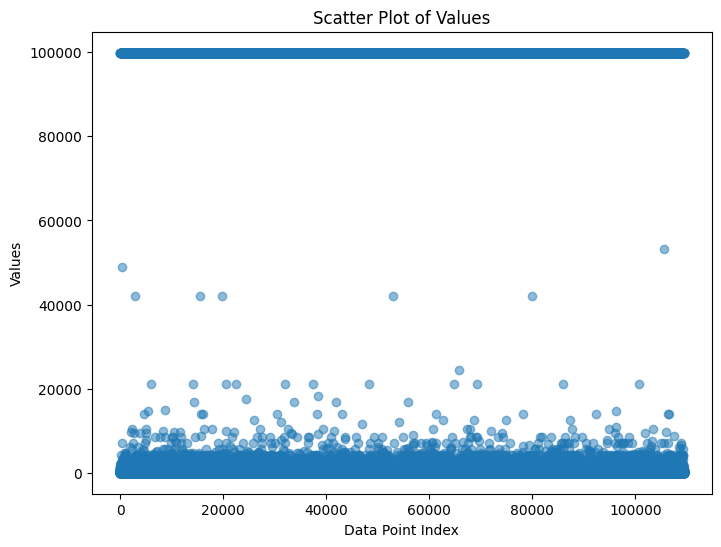

there is nan


In [172]:
id = label_list.index("_DRNKWEK")
print(label_ids[id])

drink = y[:,label_ids[id]]
plot_scatter(drink) 

#HCV_clean = replace_nan_with_majority(HCV)
#HCV_clean

In [176]:
drink
if 99900 in drink:
        print("There are 99900 values in the array.")

There are -1 values in the array.


### BMI Cleanup

In [122]:
id = np.where(labels == '_BMI5')
# print(id[0]) # here 253
BMI = y[:,id]
BMI_cleaned = replace_nan_with_mean(BMI)
BMI_cleaned_2 = BMI_clean(BMI) # mean is 27.54 before changing and 27.50 after | seems like it changed the whole BMI list ? 

there is nan
27.54835211842066
27.503954141105698


In [117]:
print(len(BMI))
print(ids)
#plot_bmi_scatter(BMI)

109379
range(0, 109379)


## Create CSV File

### CSV BMI only

In [136]:
create_csv_1(ids,"BMI", BMI, "bmi_test.csv")

CSV file 'bmi_test.csv' has been created successfully.
